# What are Light Curve Files?

In the previous tutorial we looked at Target Pixel Files (TPFs), which show how much flux is recorded by each pixel for every cadence (time stamp). Now we are going to look at a lightcurve file. There are two ways to access these. You can either generate them yourself from a TPF or you can download them from (https://archive.stsci.edu/kepler/data_search/search.php)[MAST]. The files on MAST have been built from TPFs by summing up the pixels in the aperture and correcting for spacecraft systematics and cosmic rays. Lightcurve files are a little easier to work with and are smaller in file size than the TPFs.

(Some more details of how TPFs are turned into light curve files can be found in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf).)

Firstly, let's see how to build one from the target pixel file. 

### Lightcurves from Target Pixel Files

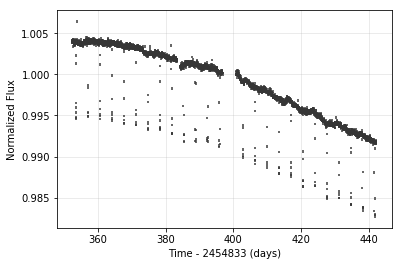

In [1]:
from lightkurve import KeplerTargetPixelFile
%matplotlib inline

#First we open the TPF
tpf = KeplerTargetPixelFile('data/kplr006922244-2010078095331_lpd-targ.fits.gz')

#Then we convert the target pixel file into a light curve.
lc = tpf.to_lightcurve()
lc.plot()

We've build a new lightcurve object 'lc'. We can use the plot method to take a look at the light curve. Note in this case we've not passed an **aperture** to the `to_lightcurve` method. In this case the default is to use the *Kepler* pipeline aperture.

By summing all the pixels in the aperture we have created a Simple Aperture Photometry (SAP) lightcurve.

We can access the meta data of the light curve in a similar way to TPFs from the previous tutorial:

In [2]:
lc.time

array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
       442.18306983, 442.2035041 ])

In [3]:
lc.quarter

4

In [4]:
lc.mission

'Kepler'

### PDCSAP from lightcurves from MAST

Lightcurves from MAST have some level of processing (more details [here](https://arxiv.org/pdf/1207.3093.pdf)) and allow you to access the **PDCSAP** flux. This is the Pre-search Data Conditioning SAP flux. Long term trends have been removed from this data such as Cotrending Basis Vectors (CBVs). PDCSAP flux is usually slightly cleaner data than the SAP flux and will have fewer long term trends.

We can read in a lightcurve file using `KeplerLightCurveFile`.

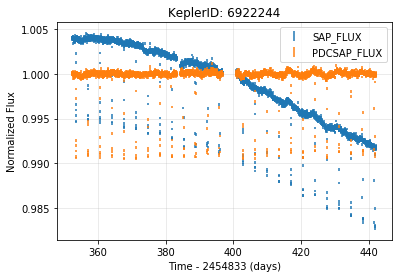

In [5]:
from lightkurve import lightcurve
lcf = lightcurve.KeplerLightCurveFile('data/kplr006922244-2010078095331_llc.fits')
lcf.plot()

The `plot` method on a `KeplerLightCurveFile` object will plot up both the SAP and PDCSAP flux. We can see that the PDCSAP flux is flatter. To work more with this data we must choose which type of flux we want to work with. Let's choose PDCSAP flux:

In [6]:
pdcsap = lcf.PDCSAP_FLUX

This has created a `KeplerLightCurve` object. The only flux it contains is the PDCSAP flux. This has methods to investigate the quality of the lightcurve. For example you can check the cdpp:

In [9]:
pdcsap.cdpp()

407.9620564267519

There is a planet in this light curve. We might want to fold the light curve on a particular period to check the transit shape of this object. We can do that with the `fold` method. This target is Kepler-8b, and the period for this planet (3.5225 days) has already been found. We can pass this and optionally a phase to `fold`, which will then fold the `time` attribute of the light curve. 

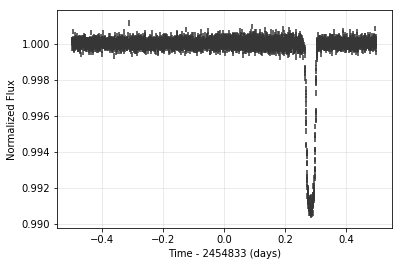

In [8]:
pdcsap.fold(period=3.5225, phase=-0.4).plot()